In [21]:
import pandas as pd

# Load the edges data
edges_file = 'lastfm_asia_edges.csv'
edges_df = pd.read_csv(edges_file)

# Load the target data
target_file = 'lastfm_asia_target.csv'
target_df = pd.read_csv(target_file)


In [22]:
# Display the first few rows of each DataFrame
print("Edges DataFrame:")
print(edges_df.head())

print("\nTarget DataFrame:")
print(target_df.head())

# Get basic information about each DataFrame
print("\nEdges DataFrame Info:")
print(edges_df.info())

print("\nTarget DataFrame Info:")
print(target_df.info())


Edges DataFrame:
   node_1  node_2
0       0     747
1       1    4257
2       1    2194
3       1     580
4       1    6478

Target DataFrame:
   id  target
0   0       8
1   1      17
2   2       3
3   3      17
4   4       5

Edges DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27806 entries, 0 to 27805
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   node_1  27806 non-null  int64
 1   node_2  27806 non-null  int64
dtypes: int64(2)
memory usage: 434.6 KB
None

Target DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7624 entries, 0 to 7623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      7624 non-null   int64
 1   target  7624 non-null   int64
dtypes: int64(2)
memory usage: 119.3 KB
None


In [23]:
# Summary statistics for edges data
print("\nSummary Statistics for Edges DataFrame:")
print(edges_df.describe())

# Summary statistics for target data
print("\nSummary Statistics for Target DataFrame:")
print(target_df.describe())

# Analyze the distribution of node degrees
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges from the DataFrame
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]

print("\nDegree Distribution:")
print(pd.Series(degree_sequence).describe())



Summary Statistics for Edges DataFrame:
             node_1        node_2
count  27806.000000  27806.000000
mean    2540.629073   5050.508523
std     1760.146912   1784.037694
min        0.000000      6.000000
25%     1065.000000   3715.000000
50%     2233.000000   5351.500000
75%     3738.000000   6538.000000
max     7580.000000   7623.000000

Summary Statistics for Target DataFrame:
                id       target
count  7624.000000  7624.000000
mean   3811.500000     9.339979
std    2201.003559     5.917230
min       0.000000     0.000000
25%    1905.750000     5.000000
50%    3811.500000    10.000000
75%    5717.250000    15.000000
max    7623.000000    17.000000

Degree Distribution:
count    7624.000000
mean        7.294334
std        11.499873
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max       216.000000
dtype: float64


In [34]:
# Statistical summary of edges dataset
edges_summary = edges_df.describe()

# Statistical summary of labels dataset
target_summary = target_df.describe()

edges_summary, target_summary


(             node_1        node_2
 count  27806.000000  27806.000000
 mean    2540.629073   5050.508523
 std     1760.146912   1784.037694
 min        0.000000      6.000000
 25%     1065.000000   3715.000000
 50%     2233.000000   5351.500000
 75%     3738.000000   6538.000000
 max     7580.000000   7623.000000,
                 id       target
 count  7624.000000  7624.000000
 mean   3811.500000     9.339979
 std    2201.003559     5.917230
 min       0.000000     0.000000
 25%    1905.750000     5.000000
 50%    3811.500000    10.000000
 75%    5717.250000    15.000000
 max    7623.000000    17.000000)

In [35]:
# Check for missing values in edges dataset
edges_missing = edges_df.isnull().sum()

# Check for missing values in labels dataset
target_missing = target_df.isnull().sum()

edges_missing, target_missing


(node_1    0
 node_2    0
 dtype: int64,
 id        0
 target    0
 dtype: int64)

In [38]:
# Basic network properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
num_connected_components = nx.number_connected_components(G)

properties = {
    'Number of Nodes': num_nodes,
    'Number of Edges': num_edges,
    'Density': density,
    'Number of Connected Components': num_connected_components
}

properties_df = pd.DataFrame(list(properties.items()), columns=['Property', 'Value'])
properties_df


,Property,Value
0,Number of Nodes,7624.000000
1,Number of Edges,27806.000000
2,Density,0.000957
3,Number of Connected Components,1.000000


Number of nodes: 7624
Number of edges: 27806


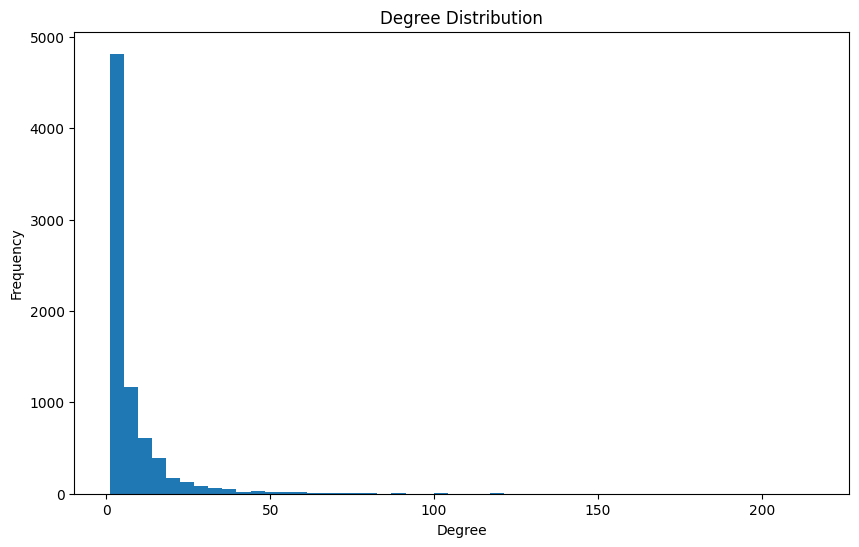

In [24]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges from the DataFrame
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

# Check basic properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]

# Plot degree distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


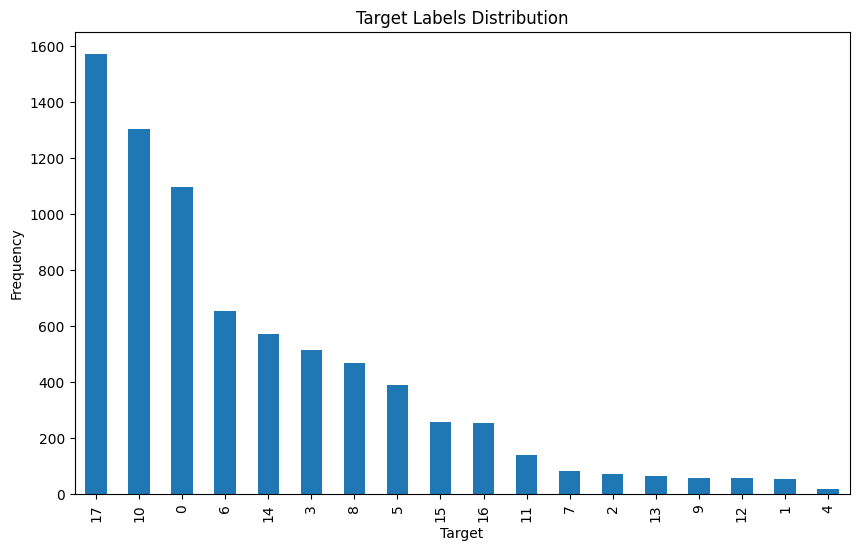

In [25]:
# Visualize target labels distribution using the correct column name 'target'
plt.figure(figsize=(10, 6))
target_df['target'].value_counts().plot(kind='bar')
plt.title('Target Labels Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


In [26]:
# Compute network density
density = nx.density(G)
print(f"Network Density: {density:.4f}")

# Compute the average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")


Network Density: 0.0010
Average Clustering Coefficient: 0.2194


In [27]:
# Compute degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Display the top 5 nodes by degree centrality
top_5_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Nodes by Degree Centrality:")
for node, centrality in top_5_degree_centrality:
    print(f"Node {node}: {centrality:.4f}")


Top 5 Nodes by Degree Centrality:
Node 7237: 0.0283
Node 3530: 0.0230
Node 4785: 0.0228
Node 524: 0.0226
Node 3450: 0.0209


In [28]:
# Compute betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(G)

# Display the top 5 nodes by betweenness centrality
top_5_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Nodes by Betweenness Centrality:")
for node, centrality in top_5_betweenness_centrality:
    print(f"Node {node}: {centrality:.4f}")


Top 5 Nodes by Betweenness Centrality:
Node 7199: 0.0899
Node 7237: 0.0856
Node 2854: 0.0776
Node 4356: 0.0672
Node 6101: 0.0518


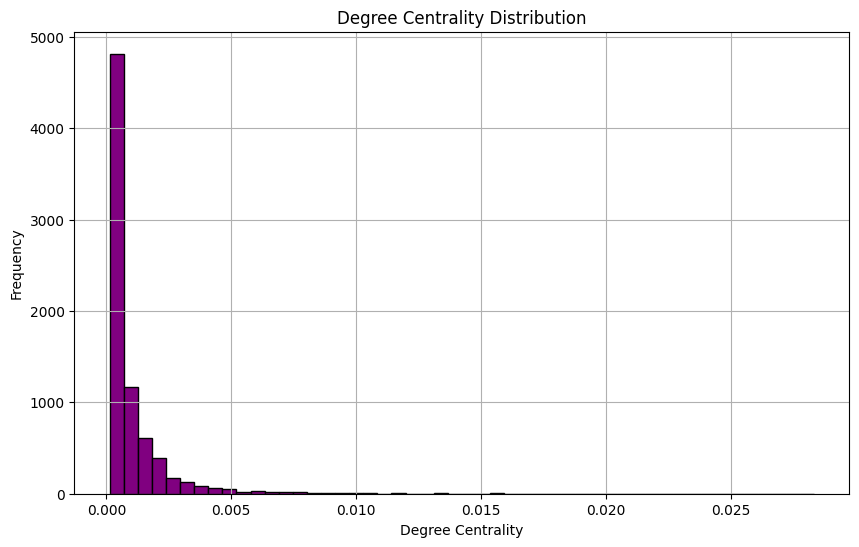

In [29]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Convert to DataFrame for better visualization
degree_centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['degree_centrality'])

# Plot degree centrality distribution
plt.figure(figsize=(10, 6))
degree_centrality_df['degree_centrality'].hist(bins=50, color='purple', edgecolor='black')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()


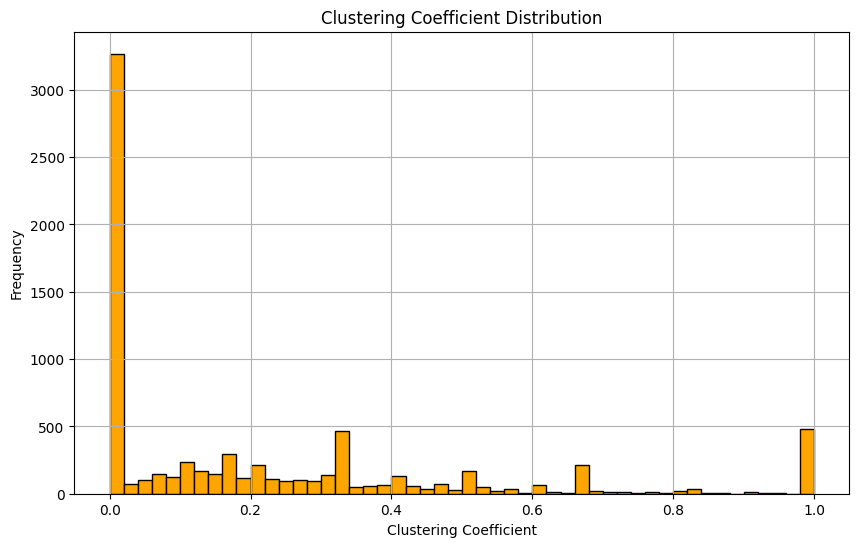

In [30]:
# Calculate clustering coefficient
clustering_coefficient = nx.clustering(G)

# Convert to DataFrame for better visualization
clustering_coefficient_df = pd.DataFrame.from_dict(clustering_coefficient, orient='index', columns=['clustering_coefficient'])

# Plot clustering coefficient distribution
plt.figure(figsize=(10, 6))
clustering_coefficient_df['clustering_coefficient'].hist(bins=50, color='orange', edgecolor='black')
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()


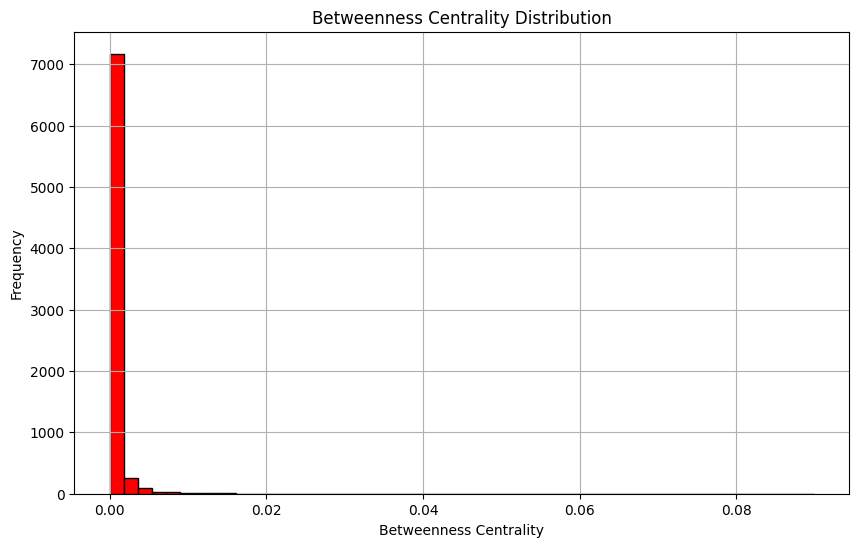

In [31]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Convert to DataFrame for better visualization
betweenness_centrality_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['betweenness_centrality'])

# Plot betweenness centrality distribution
plt.figure(figsize=(10, 6))
betweenness_centrality_df['betweenness_centrality'].hist(bins=50, color='red', edgecolor='black')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()


The largest connected component is connected.
Number of nodes in the largest connected component: 7624
Number of edges in the largest connected component: 27806


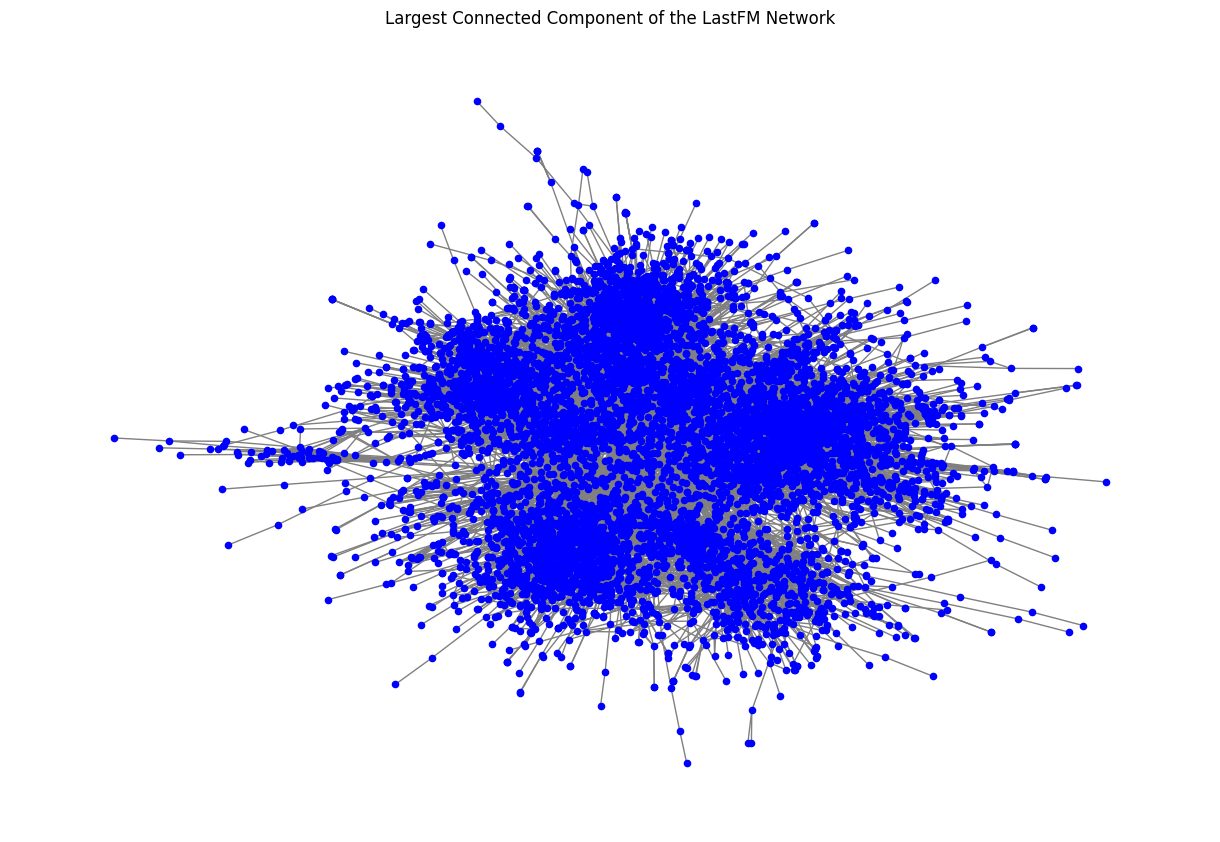

In [41]:
# Find connected components
connected_components = list(nx.connected_components(G))

# Find the largest connected component
largest_cc = max(connected_components, key=len)
G_largest_cc = G.subgraph(largest_cc).copy()

# Check properties of the largest connected component
is_largest_cc_connected = nx.is_connected(G_largest_cc)
num_nodes_largest_cc = G_largest_cc.number_of_nodes()
num_edges_largest_cc = G_largest_cc.number_of_edges()

print(f"The largest connected component is {'connected' if is_largest_cc_connected else 'not connected'}.")
print(f"Number of nodes in the largest connected component: {num_nodes_largest_cc}")
print(f"Number of edges in the largest connected component: {num_edges_largest_cc}")

# Plot the largest connected component
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_largest_cc)
nx.draw(G_largest_cc, pos, node_size=20, node_color='blue', edge_color='gray')
plt.title('Largest Connected Component of the LastFM Network')
plt.show()
